# **Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the **dataset**

In [7]:
df = pd.read_csv("loan_approval_dataset.csv")
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [8]:
# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()


In [9]:
df.shape

(4269, 13)

## **Explore the Dataset**

In [10]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [11]:
df.dtypes

,0
loan_id,int64
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64


In [12]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [13]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [14]:
df['loan_status'].value_counts()

,count
loan_status,
Approved,2656
Rejected,1613


# **Handle Missing Values**

In [15]:
df = df.dropna(subset=['loan_status'])

Option 1: Drop rows with missing target  
Option 2: Fill missing numerical columns with mean/median

Option 3: Fill missing categorical columns with mode
.....but there is no missing rows value anywhere so we are not filling them


## **Encode Categorial Variables**

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['loan_status'] = le.fit_transform(df['loan_status'])
df['education'] = le.fit_transform(df['education'])
df['self_employed'] = le.fit_transform(df['self_employed'])
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


## **Splitting X and Y values**

In [34]:
x = df.drop('loan_status',axis=1)
y = df['loan_status']

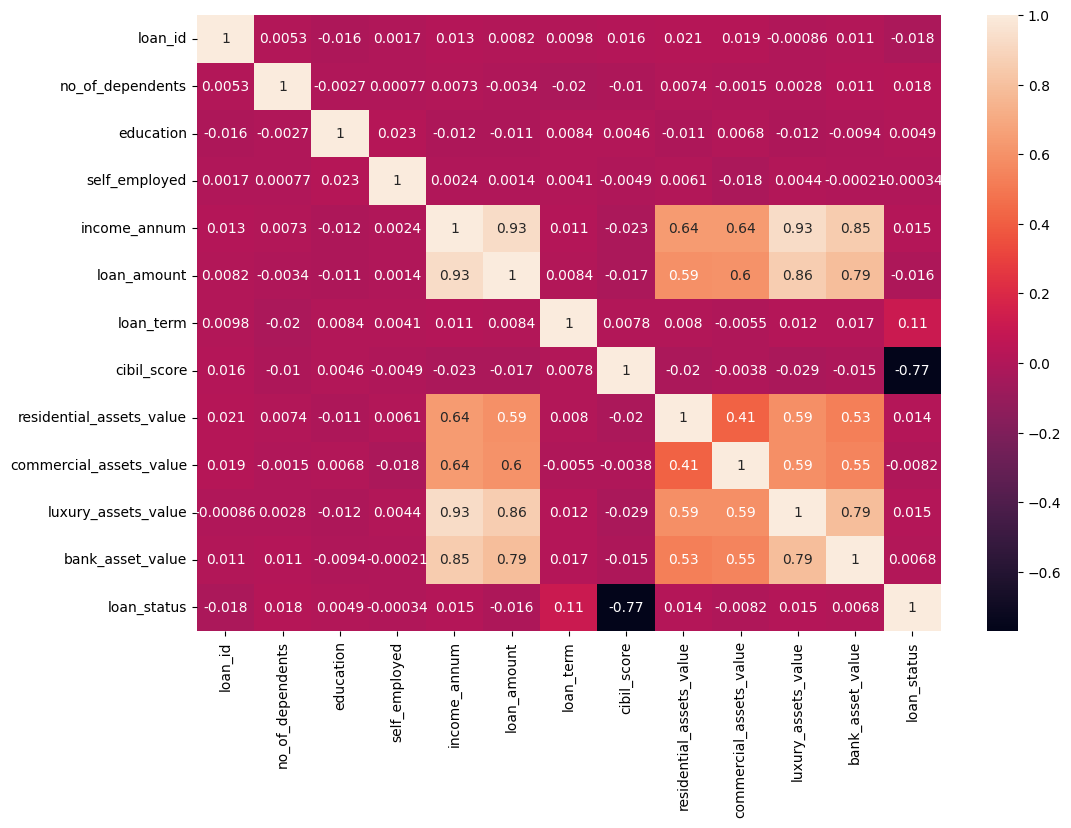

In [35]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

# **Split training and testing dataset**

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
x_train

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1675,1676,5,1,0,7900000,29900000,6,568,5800000,13900000,15900000,8700000
1164,1165,0,1,1,9600000,34000000,12,710,23800000,10300000,38100000,7800000
192,193,1,0,0,800000,2900000,8,682,2200000,1100000,2900000,700000
910,911,2,0,1,4900000,13100000,18,754,8200000,3300000,16500000,7200000
567,568,5,0,1,3000000,11100000,12,441,8500000,2500000,7300000,2000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3444,3445,0,0,1,1300000,4700000,16,530,3200000,1000000,3800000,800000
466,467,5,1,1,500000,1800000,18,411,1000000,500000,1300000,200000
3092,3093,4,1,1,8600000,20600000,16,449,10800000,10600000,28700000,5400000
3772,3773,2,1,1,7000000,21400000,12,541,3700000,1300000,19800000,9600000


In [39]:
y_test

,loan_status
1703,1
1173,0
308,1
1322,0
3271,0
...,...
912,0
443,0
1483,0
668,1


# **Logistic Regression**

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [41]:
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
y_pred = model.predict(x_test)

Accuracy

In [51]:
"Accuracy", accuracy_score(y_test, y_pred)

('Accuracy', 0.6323185011709602)

Confusion matrix

In [52]:
confusion_matrix(y_test, y_pred)

array([[505,  31],
       [283,  35]])

Precision

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
precision

0.5303030303030303

Recall

In [56]:
recall = recall_score(y_test, y_pred)
recall

0.11006289308176101

F1 score

In [57]:
f1 = f1_score(y_test, y_pred)
f1

0.18229166666666666

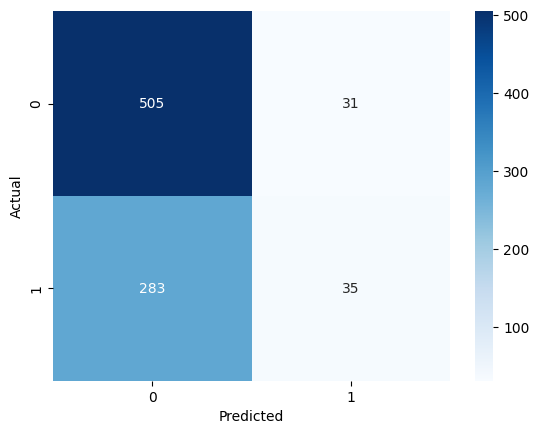

In [59]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Decision Tree Classifier**

Decision Tree Accuracy: 0.9742388758782201
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.96      0.97      0.97       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



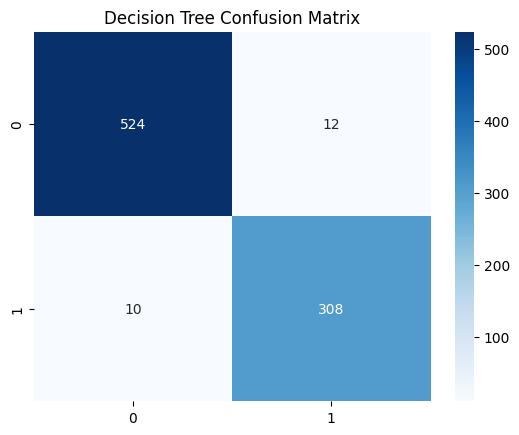

In [61]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

# Predict
y_pred_dt = dt_model.predict(x_test)

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

## **Random Forest CLassifier**

Random Forest Accuracy: 0.9765807962529274
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



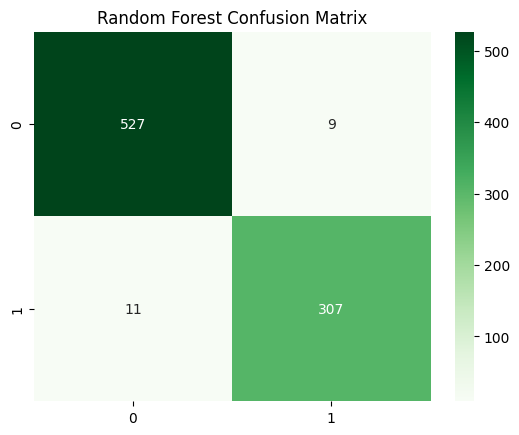

In [65]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Predict
y_pred_rf = rf_model.predict(x_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()


# **K-Nearest Neighbors (KNN)**

KNN Accuracy: 0.5772833723653396
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       536
           1       0.41      0.29      0.34       318

    accuracy                           0.58       854
   macro avg       0.52      0.52      0.51       854
weighted avg       0.55      0.58      0.56       854



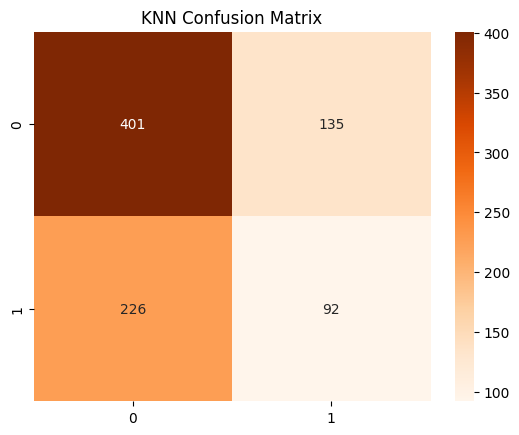

In [67]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # you can tune k
knn_model.fit(x_train, y_train)

# Predict
y_pred_knn = knn_model.predict(x_test)

# Evaluate
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Oranges')
plt.title("KNN Confusion Matrix")
plt.show()


# **Support Vector Machine (SVM)**

SVM Accuracy: 0.6276346604215457
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       536
           1       0.00      0.00      0.00       318

    accuracy                           0.63       854
   macro avg       0.31      0.50      0.39       854
weighted avg       0.39      0.63      0.48       854



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


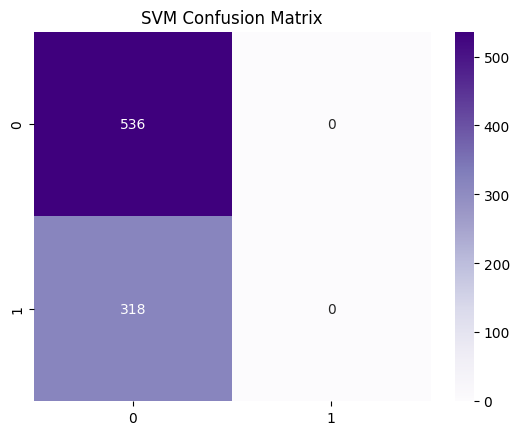

In [69]:
from sklearn.svm import SVC

# Train SVM
svm_model = SVC(kernel='rbf', random_state=42)  # You can try 'linear' kernel too
svm_model.fit(x_train, y_train)

# Predict
y_pred_svm = svm_model.predict(x_test)

# Evaluate
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Purples')
plt.title("SVM Confusion Matrix")
plt.show()
